In [1]:

!pip install pandas scikit-learn --quiet

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("/content/cleaned_speeches_spacy.csv")
assert 'Cleaned_Speech_Text' in df.columns

military_terms_expanded = list(set([
    # A. Армия и вооружённые силы
    "army", "military", "soldier", "commander", "officer", "garrison",
    "troop", "battalion", "brigade", "platoon", "infantry", "navy", "air force",
    "rocket forces", "people's army", "military personnel", "armed forces",

    # B. Оружие и технологии
    "weapon", "arms", "missile", "nuclear", "warhead", "bomb", "explosive",
    "artillery", "firepower", "munition", "rocket", "ballistic", "torpedo",
    "military technology", "advanced weapons", "strategic weapon", "chemical weapons",
    "biological weapons", "cyber-warfare", "satellite weapons", "surveillance",

    # C. Военные действия и стратегия
    "war", "battle", "combat", "conflict", "operation", "assault", "strike",
    "occupation", "siege", "mobilization", "preemptive strike", "intervention",
    "maneuver", "tactics", "deterrence", "doctrine", "offensive", "defensive",

    # D. Идеология и пропаганда
    "juche", "songun", "revolution", "socialist revolution", "leadership of the party",
    "hero", "martyr", "supreme commander", "supreme leader", "dear leader",
    "eternal president", "national defense", "socialist defense", "anti-imperialism",
    "enemy", "hostile forces", "imperialist", "capitalist enemy", "anti-u.s.",
    "anti-western", "nuclear deterrent", "revolutionary cause", "military-first policy",

    # E. Логистика и ресурсы
    "defense industry", "military production", "military base", "supply line",
    "rear services", "strategic reserve", "conscription", "training",
    "military spending", "budget", "military readiness", "drill", "command economy"
]))

vectorizer = TfidfVectorizer(vocabulary=military_terms_expanded, lowercase=True)

tfidf_matrix = vectorizer.fit_transform(df['Cleaned_Speech_Text'])

militarization_scores = tfidf_matrix.sum(axis=1).A1

df['militarization_score'] = militarization_scores

print(df[['Cleaned_Speech_Text', 'militarization_score']].head())

df.to_csv("/content/speeches_with_militarization.csv", index=False)

                                 Cleaned_Speech_Text  militarization_score
0  dwell problem need tackle last grim history at...              3.244294
1  hundred day pass since death during these day ...              2.545579
2  see grieve over death dedicate effort freedom ...              2.789795
3  morning along senior command officer army pay ...              2.283274
4  glad meet official chongryon general associati...              1.812570


In [2]:
!pip install pandas scikit-learn --quiet


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("/content/cleaned_speeches_soft.csv")
assert 'Cleaned_Speech_Text' in df.columns


military_terms_expanded = list(set([
    # A. Армия и вооружённые силы
    "army", "military", "soldier", "commander", "officer", "garrison",
    "troop", "battalion", "brigade", "platoon", "infantry", "navy", "air force",
    "rocket forces", "people's army", "military personnel", "armed forces",

    # B. Оружие и технологии
    "weapon", "arms", "missile", "nuclear", "warhead", "bomb", "explosive",
    "artillery", "firepower", "munition", "rocket", "ballistic", "torpedo",
    "military technology", "advanced weapons", "strategic weapon", "chemical weapons",
    "biological weapons", "cyber-warfare", "satellite weapons", "surveillance",

    # C. Военные действия и стратегия
    "war", "battle", "combat", "conflict", "operation", "assault", "strike",
    "occupation", "siege", "mobilization", "preemptive strike", "intervention",
    "maneuver", "tactics", "deterrence", "doctrine", "offensive", "defensive",

    # D. Идеология и пропаганда
    "juche", "songun", "revolution", "socialist revolution", "leadership of the party",
    "hero", "martyr", "supreme commander", "supreme leader", "dear leader",
    "eternal president", "national defense", "socialist defense", "anti-imperialism",
    "enemy", "hostile forces", "imperialist", "capitalist enemy", "anti-u.s.",
    "anti-western", "nuclear deterrent", "revolutionary cause", "military-first policy",

    # E. Логистика и ресурсы
    "defense industry", "military production", "military base", "supply line",
    "rear services", "strategic reserve", "conscription", "training",
    "military spending", "budget", "military readiness", "drill", "command economy"
]))


vectorizer = TfidfVectorizer(vocabulary=military_terms_expanded, lowercase=True)

tfidf_matrix = vectorizer.fit_transform(df['Cleaned_Speech_Text'])

militarization_scores = tfidf_matrix.sum(axis=1).A1

df['militarization_score'] = militarization_scores

print(df[['Cleaned_Speech_Text', 'militarization_score']].head())

df.to_csv("/content/speeches_with_militarization2.csv", index=False)

                                 Cleaned_Speech_Text  militarization_score
0  new dwell problem party need tackle last grim ...              3.244294
1  hundred day pass since death leader sung durin...              2.545579
2  see grieve over death leader sung leader dedic...              2.789795
3  morning new along senior command officer army ...              2.283274
4  glad meet official chongryon general associati...              1.812570


Топ-20 военных слов с наибольшими изменениями между периодами:
        term  TFIDF_1994_2011  TFIDF_2012_2021      Diff
         war         0.986349         3.627690  2.641341
     soldier         3.172002         0.677763 -2.494239
 imperialist         3.697785         1.304079 -2.393706
      songun         4.205899         2.304757 -1.901142
     nuclear         0.594873         2.468311  1.873439
    military         2.850025         4.235698  1.385673
        army         5.787845         4.451963 -1.335882
      combat         0.329532         1.517319  1.187787
  revolution         7.747899         6.631306 -1.116593
       juche         3.957287         4.817301  0.860014
      battle         1.115021         0.343948 -0.771073
   offensive         0.383004         1.130684  0.747680
mobilization         0.684581         0.112471 -0.572110
   commander         1.137885         0.598192 -0.539693
      martyr         0.124583         0.624625  0.500042
       enemy         1.76

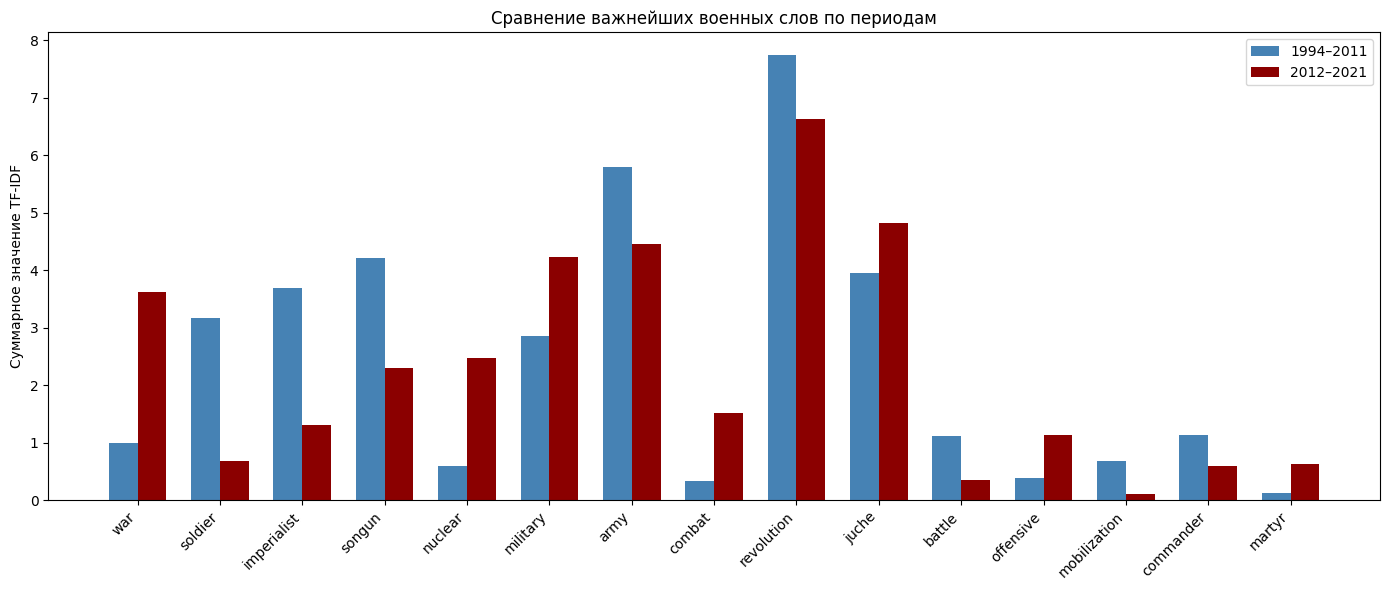

In [4]:

!pip install pandas scikit-learn matplotlib --quiet


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv("/content/cleaned_speeches_spacy.csv")


assert 'Cleaned_Speech_Text' in df.columns

df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# Расширенный список военных терминов
military_terms_expanded = list(set([
    # A. Армия и вооружённые силы
    "army", "military", "soldier", "commander", "officer", "garrison",
    "troop", "battalion", "brigade", "platoon", "infantry", "navy", "air force",
    "rocket forces", "people's army", "military personnel", "armed forces",
    # B. Оружие и технологии
    "weapon", "arms", "missile", "nuclear", "warhead", "bomb", "explosive",
    "artillery", "firepower", "munition", "rocket", "ballistic", "torpedo",
    "military technology", "advanced weapons", "strategic weapon", "chemical weapons",
    "biological weapons", "cyber-warfare", "satellite weapons", "surveillance",
    # C. Военные действия и стратегия
    "war", "battle", "combat", "conflict", "operation", "assault", "strike",
    "occupation", "siege", "mobilization", "preemptive strike", "intervention",
    "maneuver", "tactics", "deterrence", "doctrine", "offensive", "defensive",
    # D. Идеология и пропаганда
    "juche", "songun", "revolution", "socialist revolution", "leadership of the party",
    "hero", "martyr", "supreme commander", "supreme leader", "dear leader",
    "eternal president", "national defense", "socialist defense", "anti-imperialism",
    "enemy", "hostile forces", "imperialist", "capitalist enemy", "anti-u.s.",
    "anti-western", "nuclear deterrent", "revolutionary cause", "military-first policy",
    # E. Логистика и ресурсы
    "defense industry", "military production", "military base", "supply line",
    "rear services", "strategic reserve", "conscription", "training",
    "military spending", "budget", "military readiness", "drill", "command economy"
]))

df_94_11 = df[(df['Year'] >= 1994) & (df['Year'] <= 2011)]
df_12_21 = df[(df['Year'] >= 2012) & (df['Year'] <= 2021)]

vectorizer = TfidfVectorizer(vocabulary=military_terms_expanded, lowercase=True)

tfidf_94_11 = vectorizer.fit_transform(df_94_11['Cleaned_Speech_Text'])
tfidf_12_21 = vectorizer.fit_transform(df_12_21['Cleaned_Speech_Text'])

terms = vectorizer.get_feature_names_out()
tfidf_sum_94_11 = np.asarray(tfidf_94_11.sum(axis=0)).flatten()
tfidf_sum_12_21 = np.asarray(tfidf_12_21.sum(axis=0)).flatten()


compare_df = pd.DataFrame({
    'term': terms,
    'TFIDF_1994_2011': tfidf_sum_94_11,
    'TFIDF_2012_2021': tfidf_sum_12_21
})
compare_df['Diff'] = compare_df['TFIDF_2012_2021'] - compare_df['TFIDF_1994_2011']
compare_df_sorted = compare_df.reindex(compare_df['Diff'].abs().sort_values(ascending=False).index)


print("Топ-20 военных слов с наибольшими изменениями между периодами:")
print(compare_df_sorted.head(20).to_string(index=False))


top_diff = compare_df_sorted.head(15)
x = np.arange(len(top_diff['term']))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, top_diff['TFIDF_1994_2011'], width, label='1994–2011', color='steelblue')
plt.bar(x + width/2, top_diff['TFIDF_2012_2021'], width, label='2012–2021', color='darkred')

plt.xticks(x, top_diff['term'], rotation=45, ha='right')
plt.ylabel('Суммарное значение TF-IDF')
plt.title('Сравнение важнейших военных слов по периодам')
plt.legend()
plt.tight_layout()
plt.show()

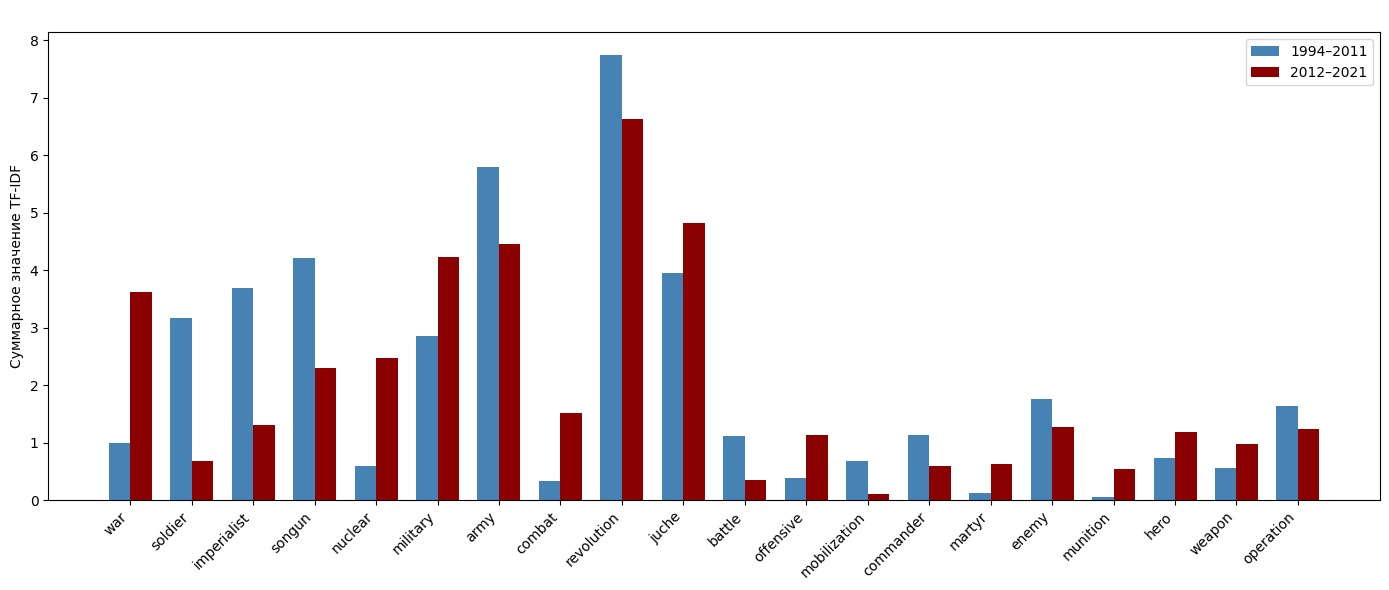

In [5]:
top_diff = compare_df_sorted.head(20)


x = np.arange(len(top_diff['term']))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, top_diff['TFIDF_1994_2011'], width, label='1994–2011', color='steelblue')
plt.bar(x + width/2, top_diff['TFIDF_2012_2021'], width, label='2012–2021', color='darkred')

plt.xticks(x, top_diff['term'], rotation=45, ha='right')
plt.ylabel('Суммарное значение TF-IDF')
plt.title(' ')
plt.legend()
plt.tight_layout()
plt.show()